Задача: обучить модели на датасете CIFAR100 c ограниченным числом параметров.
Необходимо провести исследование и построить кривую в осях количество параметров - качество. 
Минимальный набор точек для исследования по числу параметров: 1000, 5000, 10000, 50000, 100000, 500000, 1000000.
Для сдачи задачи необходимо предоставить код обучения, чекпоинты моделей и визуализацию результатов.

up to 100 000 обязательно

исследования и эксперименты

поиграться с архитектурами

top1 accuracy

надо будет рассказать что дало баф и что пробовали

если просто каждую один раз обучить, то 15/25 баллов
если чуть чуть исследований то 20
доп баллы победителям категорий (маленькие круче)


# load CIFAR-100

In [1]:
import torch
import numpy as np
torch.manual_seed(100)

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|████████████████████████████████████████████████████| 169001437/169001437 [00:29<00:00, 5634734.69it/s]


Extracting data\cifar-100-python.tar.gz to data
Files already downloaded and verified


In [3]:
classes = """0: apple
1: aquarium_fish
2: baby
3: bear
4: beaver
5: bed
6: bee
7: beetle
8: bicycle
9: bottle
10: bowl
11: boy
12: bridge
13: bus
14: butterfly
15: camel
16: can
17: castle
18: caterpillar
19: cattle
20: chair

21: chimpanzee

22: clock

23: cloud

24: cockroach

25: couch

26: cra

27: crocodile

28: cup

29: dinosaur

30: dolphin

31: elephant

32: flatfish

33: forest

34: fox

35: girl

36: hamster

37: house

38: kangaroo

39: keyboard

40: lamp

41: lawn_mower

42: leopard

43: lion

44: lizard

45: lobster

46: man

47: maple_tree

48: motorcycle

49: mountain

50: mouse

51: mushroom

52: oak_tree

53: orange

54: orchid

55: otter

56: palm_tree

57: pear

58: pickup_truck

59: pine_tree

60: plain

61: plate

62: poppy

63: porcupine

64: possum

65: rabbit

66: raccoon

67: ray

68: road

69: rocket

70: rose

71: sea

72: seal

73: shark

74: shrew

75: skunk

76: skyscraper

77: snail

78: snake

79: spider

80: squirrel

81: streetcar

82: sunflower

83: sweet_pepper

84: table

85: tank

86: telephone

87: television

88: tiger

89: tractor

90: train

91: trout

92: tulip
93: turtle
94: wardrobe
95: whale
96: willow_tree
97: wolf
98: woman
99: worm"""

In [4]:
labels = classes.split()[1::2]

In [5]:
len(labels)

100

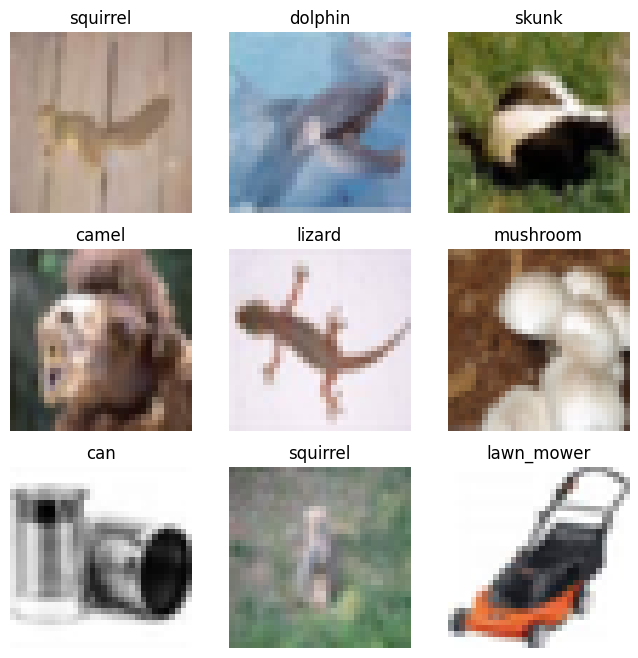

In [6]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item() # Случайный индекс из датасета
    img, label = training_data[sample_idx] # Обращение по такому индексу возвращает изображение и метку элемента датасета
    figure.add_subplot(rows, cols, i)
    plt.title(labels[label])
    plt.axis("off")
    plt.imshow(np.moveaxis(img.numpy(),0,-1))
plt.show()

In [7]:
img.numpy().shape

(3, 32, 32)

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# first tries (model has 969512 parameters)



In [9]:
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [10]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=7, kernel_size=(3, 3), stride=2, padding=(1, 1), bias=True),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(16*16*7, 512),
            nn.ReLU(),
            nn.Linear(512, 100),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [11]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(3, 7, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=1792, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=100, bias=True)
  )
)


In [12]:
X = torch.rand(1, 3, 32, 32, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred.numpy()[0]}, {labels[y_pred.numpy()[0]]}")

Predicted class: 22, clock


можно вызывать по слоям:

In [13]:
"""
x0 = model.linear_relu_stack[0](X)
print(model.linear_relu_stack[0])
print(x0.size())
print(x0[0, 0, :4, :4])

x1 = model.linear_relu_stack[1](x0)
print(model.linear_relu_stack[1])
print(x1.size())
print(x1[0, 0, :4, :4])

...
"""

'\nx0 = model.linear_relu_stack[0](X)\nprint(model.linear_relu_stack[0])\nprint(x0.size())\nprint(x0[0, 0, :4, :4])\n\nx1 = model.linear_relu_stack[1](x0)\nprint(model.linear_relu_stack[1])\nprint(x1.size())\nprint(x1[0, 0, :4, :4])\n\n...\n'

In [14]:
#мсотреть на параметры
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(3, 7, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=1792, out_features=512, bias=True)
    (4): ReLU()
    (5): Linear(in_features=512, out_features=100, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([7, 3, 3, 3]) | Values : tensor([[[[-0.1470, -0.1456,  0.0907],
          [ 0.0815,  0.1107, -0.0314],
          [ 0.1545,  0.1913,  0.0987]],

         [[-0.1063, -0.0761, -0.1238],
          [ 0.1246,  0.0215,  0.1836],
          [-0.0215,  0.1724,  0.0941]],

         [[-0.0042, -0.0991,  0.0771],
          [ 0.0107, -0.0973,  0.1120],
          [-0.0294, -0.1859, -0.1074]]],


        [[[ 0.1746,  0.0794, -0.1298],
          [ 0.1502,  0.0063, -0.1786],
          [ 0.0568, -0.0604, -0.0700]],

         [[ 0.0100, -0.1753,  0.0048],
          [ 0.1559,  0.0381, -0.0212],
          [ 0.087

In [15]:
#how many params:
def param_count(model):
  c = 0
  for param in model.parameters():
      laypar = 1
      for a in list(param.size()):
          laypar *= a
      #print(f"Size: {list(param.size())}, layer: {laypar}")
      c += laypar
  print(f'model has {c} parameters')

param_count(model)

model has 969512 parameters


теперь обучение

In [16]:
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

 функцию обучения, которая будет проходить одну эпоху (т.е. один проход по всему датасету), получать предсказания модели для всех данных, вычислять лосс, градиенты лосса по параметрам модели и производить шаг алгоритма оптимизации.
Каждые 100 батчей мы будем печатать значение лосса и текущий прогресс.

In [17]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Получаем предсказания модели для данного батча
        pred = model(X)
        # Вычисляем лосс
        loss = loss_fn(pred, y)

        # Backpropagation
        # Обнуляем градиенты
        optimizer.zero_grad()
        # Вычисляем градиент лосса по параметрам модели
        loss.backward()
        # Производим шаг алгоритма оптимизации
        optimizer.step()

        if batch % 300 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [18]:
def test_loop(dataloader, model, loss_fn, accs):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    accs.append(100*correct)

In [19]:
epochs = 30
accs = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    model.train(True)
    train_loop(train_dataloader, model, loss_fn, optimizer)
    model.train(False)
    test_loop(test_dataloader, model, loss_fn, accs)
print("Done!")

Epoch 1
-------------------------------
loss: 4.600007  [    0/50000]
loss: 4.596367  [19200/50000]
loss: 4.611847  [38400/50000]
Test Error: 
 Accuracy: 1.0%, Avg loss: 4.602336 

Epoch 2
-------------------------------
loss: 4.607390  [    0/50000]
loss: 4.588484  [19200/50000]
loss: 4.596535  [38400/50000]
Test Error: 
 Accuracy: 1.4%, Avg loss: 4.598754 

Epoch 3
-------------------------------
loss: 4.603350  [    0/50000]
loss: 4.598077  [19200/50000]
loss: 4.611131  [38400/50000]
Test Error: 
 Accuracy: 1.7%, Avg loss: 4.594395 

Epoch 4
-------------------------------
loss: 4.593838  [    0/50000]
loss: 4.587810  [19200/50000]
loss: 4.597446  [38400/50000]
Test Error: 
 Accuracy: 1.5%, Avg loss: 4.588907 

Epoch 5
-------------------------------
loss: 4.591902  [    0/50000]
loss: 4.578147  [19200/50000]
loss: 4.592684  [38400/50000]
Test Error: 
 Accuracy: 1.3%, Avg loss: 4.582140 

Epoch 6
-------------------------------
loss: 4.578915  [    0/50000]
loss: 4.594480  [19200/50

ОНО РАБОТАЕТ!!!!

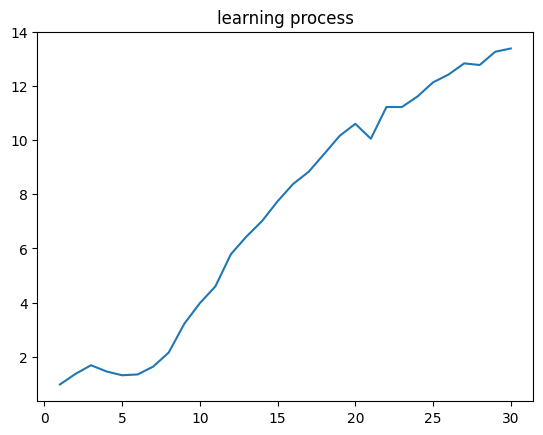

In [20]:
#pict of learning
#вообще оно до этого училось эпох 10...

plt.plot(range(1,epochs+1), accs, label = 'epochs')
plt.title('learning process')
plt.show()

# 1000 params

only conv